### Reference:
    
Wiki

https://stackoverflow.com/questions/36756335/calculating-idf-using-tfidfvectorizer-from-sklearn-feature-extraction-text-tfidf   

## Term frequency

> the number of times a term occurs in a document is called its term frequency


## Inverse document frequency

> an inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

tf–idf is the **product of two statistics**, term frequency and inverse document frequency.

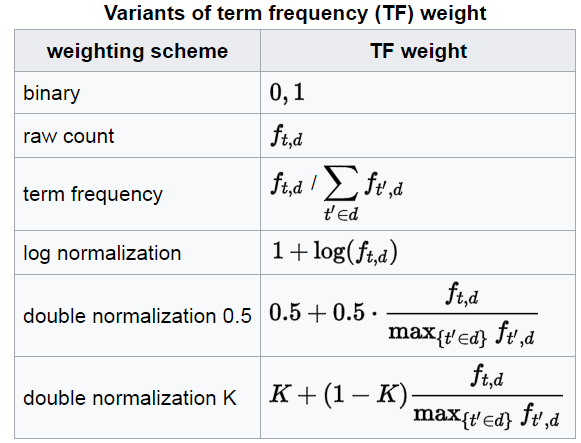


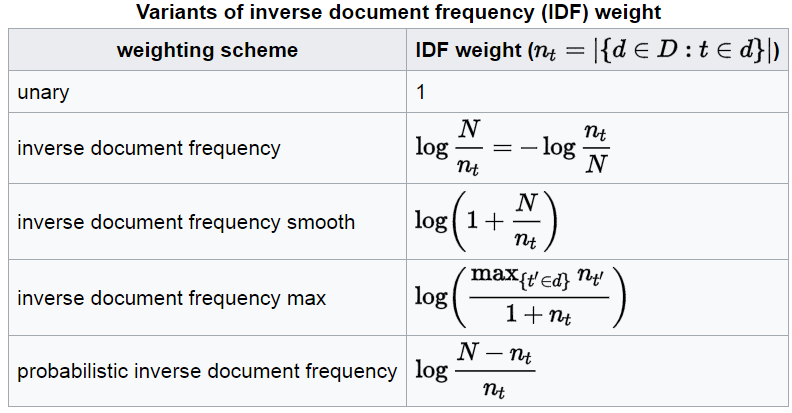

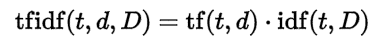

## Example

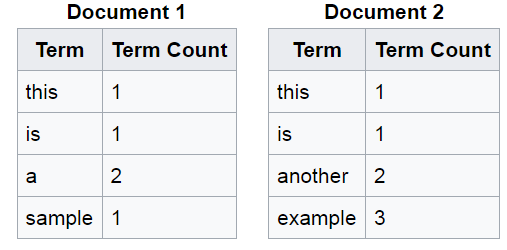

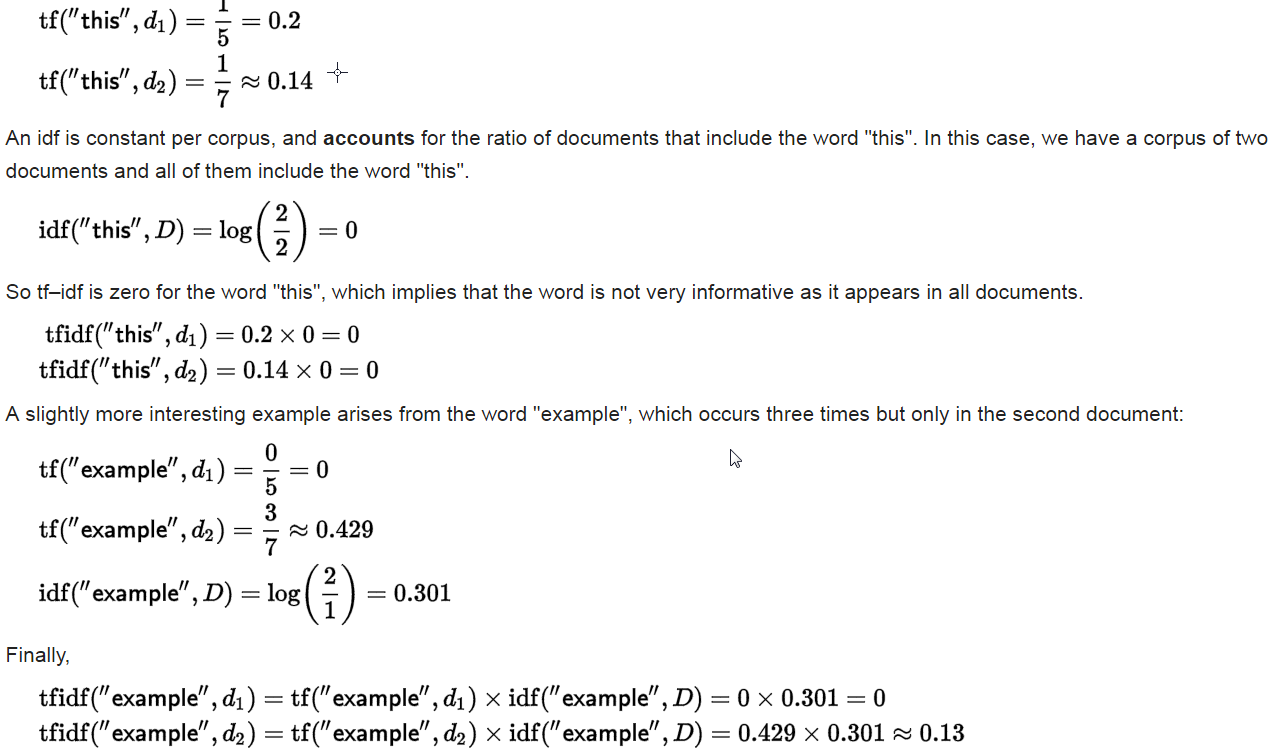

### Special Notes for Sklearn TF-IDF lib

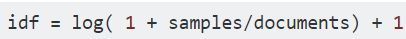

Need to substract 1 with smooth_idf=False to align Wiki example 

#### It uses natural log so the value is different to the Wiki example
> log_e(2) = 0.69 (base e)

> log(2) = 0.301 (base 10)

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

corpus = [  
    'this is a a sample',  
    'this is another another example example example'
]  

# the default token pattern get word >= 2 chars, which ignores 'a'
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
X = vectorizer.fit_transform(corpus)  
words = vectorizer.get_feature_names() 

for i in range(len(corpus)):
    print('corpus [{}]'.format(i))
    print(list(zip(words, X.toarray()[i])))

transformer = TfidfTransformer(smooth_idf=False, norm=None, use_idf=True)  
tfidf = transformer.fit_transform(X)  

# TfidfTransformer always adds 1 to the weight so we need to substract 1
# see https://stackoverflow.com/questions/36756335/calculating-idf-using-tfidfvectorizer-from-sklearn-feature-extraction-text-tfidf
# another point is sklearn use np.log which is natural log (base e), 
# log_e(2) = 0.69 (base e)
# log(2) = 0.301 (base 10)
idf = transformer.idf_ - 1

print(dict(zip(vectorizer.get_feature_names(), idf)))

for i in range(len(corpus)):
    print('corpus [{}]'.format(i))
    tf = X.toarray()[i]
    tf_total = sum(tf)
    
    for j in range(len(words)):
        print('tf_idf of [{}]: {}'.format(words[j], (tf[j] / tf_total) * idf[j]))



corpus [0]
[('a', 2), ('another', 0), ('example', 0), ('is', 1), ('sample', 1), ('this', 1)]
corpus [1]
[('a', 0), ('another', 2), ('example', 3), ('is', 1), ('sample', 0), ('this', 1)]
{'a': 0.6931471805599454, 'this': 0.0, 'is': 0.0, 'example': 0.6931471805599454, 'another': 0.6931471805599454, 'sample': 0.6931471805599454}
corpus [0]
tf_idf of [a]: 0.27725887222397816
tf_idf of [another]: 0.0
tf_idf of [example]: 0.0
tf_idf of [is]: 0.0
tf_idf of [sample]: 0.13862943611198908
tf_idf of [this]: 0.0
corpus [1]
tf_idf of [a]: 0.0
tf_idf of [another]: 0.1980420515885558
tf_idf of [example]: 0.2970630773828337
tf_idf of [is]: 0.0
tf_idf of [sample]: 0.0
tf_idf of [this]: 0.0


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer 
  
corpus = [  
    'this is a a sample',  
    'this is another another example example example'
]  

vectorizer = TfidfVectorizer(smooth_idf=False, norm=None, use_idf=True) 
corpus_tf_idf = vectorizer.fit_transform(corpus) 
print(corpus_tf_idf)
print(vectorizer.idf_)

words = vectorizer.get_feature_names()
print(words)


  (0, 4)	1.0
  (0, 2)	1.0
  (0, 3)	1.69314718056
  (1, 4)	1.0
  (1, 2)	1.0
  (1, 0)	3.38629436112
  (1, 1)	5.07944154168
[ 1.69314718  1.69314718  1.          1.69314718  1.        ]
['another', 'example', 'is', 'sample', 'this']
